<a href="https://colab.research.google.com/github/FathimaNazarudeen/lung-cancer/blob/main/2nd%20dataset%20Recursive%20Feature%20Elimination%20(RFE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd 
import numpy as np

In [33]:
data=pd.read_csv("/content/thirddatasetdata2editednew.csv")

In [34]:
data['Label'].value_counts()

adeno       42
squamous    35
other       12
Name: Label, dtype: int64

In [35]:
data.columns 

Index(['imaging.radiomics.GLCM_autocorr', 'imaging.radiomics.GLCM_clusProm',
       'imaging.radiomics.GLCM_clusShade', 'imaging.radiomics.GLCM_clusTend',
       'imaging.radiomics.GLCM_contrast', 'imaging.radiomics.GLCM_correl1',
       'imaging.radiomics.GLCM_diffEntro', 'imaging.radiomics.GLCM_dissimilar',
       'imaging.radiomics.GLCM_energy', 'imaging.radiomics.GLCM_entrop2',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var', 'Label'],
      dtype='object', length=651)

In [36]:
data_real = data.replace(np.inf, np.nan)

In [37]:
data_real.isnull().sum().sum()

0

In [38]:
data_df = data_real.dropna(axis=0)

In [39]:
data_df.isnull().sum().sum()

0

In [40]:
data_df

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,Label
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04,squamous
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05,squamous
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09,squamous
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05,squamous
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05,squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04,other
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05,other
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04,other
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04,other


In [41]:
data_X = data_df.drop(['Label'], axis = 1)

In [42]:
data_X.columns 

Index(['imaging.radiomics.GLCM_autocorr', 'imaging.radiomics.GLCM_clusProm',
       'imaging.radiomics.GLCM_clusShade', 'imaging.radiomics.GLCM_clusTend',
       'imaging.radiomics.GLCM_contrast', 'imaging.radiomics.GLCM_correl1',
       'imaging.radiomics.GLCM_diffEntro', 'imaging.radiomics.GLCM_dissimilar',
       'imaging.radiomics.GLCM_energy', 'imaging.radiomics.GLCM_entrop2',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_mean',
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var'],
      dtype='object', length=650)

In [43]:
data_X.shape 

(89, 650)

In [44]:
data_y = data_df['Label']

In [45]:
data_y.shape 

(89,)

In [46]:
data_df.isnull().sum().sum()

0

In [47]:
data_y.unique()

array(['squamous', 'adeno', 'other'], dtype=object)

In [48]:
data_X 

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_mean,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2859.588978,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2789.090292,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,4730.382935,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5711.785210,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2495.763162,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2859.108700,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5679.682203,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04


Label encoding

In [49]:
from sklearn.preprocessing import LabelEncoder 

In [50]:
le = LabelEncoder()

In [51]:
data_y_trans = le.fit_transform(data_y)


In [52]:
data_X

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_mean,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2859.588978,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2789.090292,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,4730.382935,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5711.785210,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2495.763162,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2859.108700,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5679.682203,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04


In [53]:
df2 = pd.DataFrame(data_X)  

In [54]:
df2.to_csv(r'my_data.csv', index=False)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, train_size = 0.7)

In [56]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

FEATURE SELECTION

Recursive Feature Elimination (RFE)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

lin_reg=LinearRegression()

rfe_mod=RFE(lin_reg)
myvalues=rfe_mod.fit(data_X, data_y_trans)
myvalues.support_
myvalues.ranking_


print("Num of features: %s"%(myvalues.n_features_))
print("Selected features:%s"%(myvalues.support_))
print("Feature Ranking :%s"%(myvalues.ranking_))

Num of features: 325
Selected features:[ True  True  True  True  True False False  True False False False False
 False False False False False False  True False  True  True  True False
  True  True False False  True False  True False False False False  True
  True  True  True  True False False False False  True  True  True  True
  True False False False False  True  True  True  True  True False False
 False False  True  True  True False  True False False False False  True
  True  True  True  True False False False False  True  True  True False
  True False False False False  True  True  True  True  True False False
 False  True False  True  True False  True False False False False  True
  True  True  True  True False False False False  True  True  True  True
  True False False False False  True  True  True False  True False False
 False  True  True  True  True False  True False False False  True  True
  True  True  True  True False False False False  True  True  True False
  True False

In [59]:
myvalues.n_features_

325

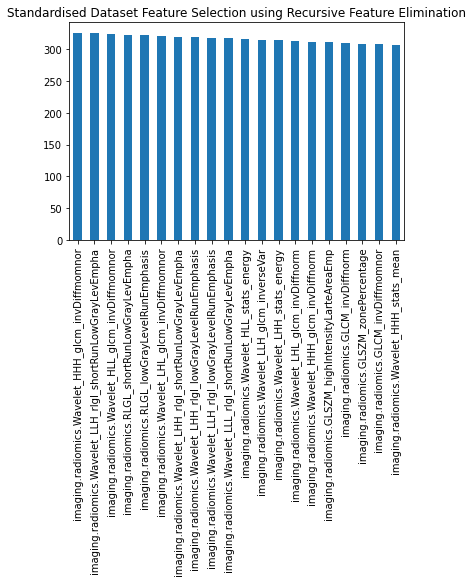

In [60]:
feature_importance_std = pd.Series(myvalues.ranking_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using Recursive Feature Elimination')

In [61]:
feature_importance_std.nlargest(20)

imaging.radiomics.Wavelet_HHH_glcm_invDiffmomnor              326
imaging.radiomics.Wavelet_LLH_rlgl_shortRunLowGrayLevEmpha    325
imaging.radiomics.Wavelet_HLL_glcm_invDiffmomnor              324
imaging.radiomics.RLGL_shortRunLowGrayLevEmpha                323
imaging.radiomics.RLGL_lowGrayLevelRunEmphasis                322
imaging.radiomics.Wavelet_LHL_glcm_invDiffmomnor              321
imaging.radiomics.Wavelet_LHH_rlgl_shortRunLowGrayLevEmpha    320
imaging.radiomics.Wavelet_LHH_rlgl_lowGrayLevelRunEmphasis    319
imaging.radiomics.Wavelet_LLH_rlgl_lowGrayLevelRunEmphasis    318
imaging.radiomics.Wavelet_LLL_rlgl_shortRunLowGrayLevEmpha    317
imaging.radiomics.Wavelet_HLL_stats_energy                    316
imaging.radiomics.Wavelet_LLH_glcm_inverseVar                 315
imaging.radiomics.Wavelet_LHH_stats_energy                    314
imaging.radiomics.Wavelet_LHL_glcm_invDiffnorm                313
imaging.radiomics.Wavelet_HHH_glcm_invDiffnorm                312
imaging.ra

In [62]:
data_new_20features_X = data_X[['imaging.radiomics.Wavelet_HHH_glcm_invDiffmomnor',
'imaging.radiomics.Wavelet_LLH_rlgl_shortRunLowGrayLevEmpha',
'imaging.radiomics.Wavelet_HLL_glcm_invDiffmomnor',
'imaging.radiomics.RLGL_shortRunLowGrayLevEmpha',
'imaging.radiomics.RLGL_lowGrayLevelRunEmphasis',
'imaging.radiomics.Wavelet_LHL_glcm_invDiffmomnor',
'imaging.radiomics.Wavelet_LHH_rlgl_shortRunLowGrayLevEmpha',
'imaging.radiomics.Wavelet_LHH_rlgl_lowGrayLevelRunEmphasis',
'imaging.radiomics.Wavelet_LLH_rlgl_lowGrayLevelRunEmphasis',
'imaging.radiomics.Wavelet_LLL_rlgl_shortRunLowGrayLevEmpha',
'imaging.radiomics.Wavelet_HLL_stats_energy',
'imaging.radiomics.Wavelet_LLH_glcm_inverseVar',
'imaging.radiomics.Wavelet_LHH_stats_energy',
'imaging.radiomics.Wavelet_LHL_glcm_invDiffnorm',
'imaging.radiomics.Wavelet_HHH_glcm_invDiffnorm',
'imaging.radiomics.GLSZM_highIntensityLarteAreaEmp',
'imaging.radiomics.GLCM_invDiffnorm',
'imaging.radiomics.GLSZM_zonePercentage',
'imaging.radiomics.GLCM_invDiffmomnor',
'imaging.radiomics.Wavelet_HHH_stats_mean']]

In [63]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, train_size = 0.8, random_state=26)

In [64]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=56)
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier(random_state=56)

In [67]:
from sklearn.metrics import accuracy_score 

In [69]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
from sklearn.model_selection import cross_validate

In [76]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [77]:
print(conf_mat)

[[41  0  1]
 [ 0 12  0]
 [ 1  0 34]]


In [78]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       1.00      1.00      1.00        12
           2       0.97      0.97      0.97        35

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



In [81]:
import matplotlib.pyplot as plt

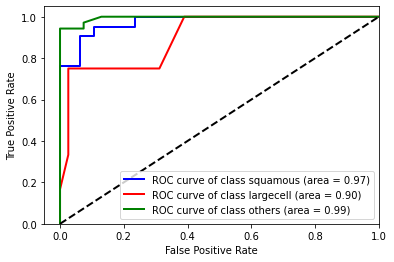

In [83]:
y_score = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=2 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

svm

In [84]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=4, C=1)

In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [86]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       1.00      1.00      1.00        12
           2       0.89      0.91      0.90        35

    accuracy                           0.92        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.92      0.92      0.92        89



knn

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) 

In [88]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [89]:
print("Classification Report for knn: \n", classification_report(data_y_trans,y_pred))

Classification Report for knn: 
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.67      0.67      0.67        12
           2       0.80      0.69      0.74        35

    accuracy                           0.72        89
   macro avg       0.72      0.70      0.71        89
weighted avg       0.73      0.72      0.72        89



ROC Curve

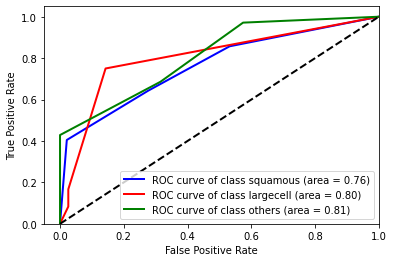

In [90]:
y_score = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=2 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

GradientBoostingClassifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gradient_boost = GradientBoostingClassifier(random_state=56)

In [93]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [94]:
print("Classification Report for xgboost: \n", classification_report(data_y_trans,y_pred))

Classification Report for xgboost: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.92      1.00      0.96        12
           2       1.00      0.91      0.96        35

    accuracy                           0.96        89
   macro avg       0.95      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



ROC

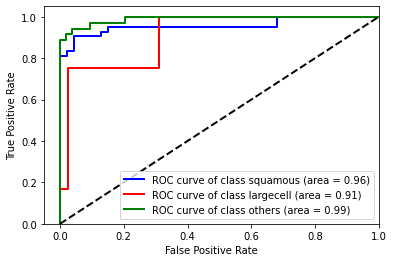

In [95]:
y_score = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=2 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()